In [1]:
# Importing required libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.simplefilter("ignore")

In [4]:
# Loading dataset
df = pd.read_csv("titanic/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Finding the shape 
df.shape

(891, 12)

In [6]:
# Make a copy of dataset
data = df.copy()

# Exploratory Data Analysis (EDA)

In [7]:
# droping passenger id , we dont need it
df = df.drop(["PassengerId"], axis=1)

In [8]:
# Getting consice information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [9]:
# Checking for missing values

In [10]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [11]:
# checking for duplicate rows
df.duplicated().sum()

0

In [12]:
#Data Types

In [13]:
## Numerical datatypes

In [14]:
numerical_features = [feature for feature in df.columns if df[feature].dtype not in ['o','object','O','Object']]

In [15]:
numerical_features

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [16]:
# Getting descriptive analysis of numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [17]:
## Categorical Features

In [18]:
categorical_features = [feature for feature in df.columns if df[feature].dtype in ['o','object','O','Object']]

In [19]:
categorical_features

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [20]:
df[categorical_features].describe().T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


# Data Analysing

## Univeriant Analysis

### # Analysing target feature

In [21]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [22]:
# Analysing target feature in percentage
df["Survived"].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

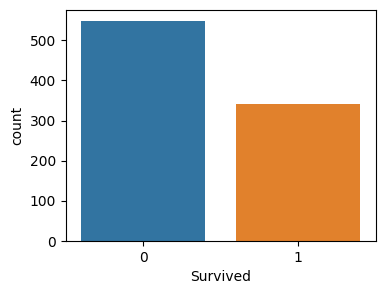

In [23]:
# ploting count plot 
plt.figure(figsize=(4,3))
sns.countplot(x=df["Survived"], data=df)
plt.show()

In [24]:
# This is little bit un blanced dataset

In [25]:
# using group by function to get more information about our target variable
df.groupby("Survived").agg(["count","min", "max","mean"])

Pclass                     Age                        SibSp          \
          count min max      mean count   min   max       mean count min max   
Survived                                                                       
0           549   1   3  2.531876   424  1.00  74.0  30.626179   549   0   8   
1           342   1   3  1.950292   290  0.42  80.0  28.343690   342   0   4   

                   Parch                    Fare                            
              mean count min max      mean count  min       max       mean  
Survived                                                                    
0         0.553734   549   0   6  0.329690   549  0.0  263.0000  22.117887  
1         0.473684   342   0   5  0.464912   342  0.0  512.3292  48.395408

In [26]:
# using group by function to get more information about our target variable for categorical features
df.groupby("Survived")[categorical_features].agg(["count"])

,Name,Sex,Ticket,Cabin,Embarked
,count,count,count,count,count
Survived,,,,,
0,549,549,549,68,549
1,342,342,342,136,340


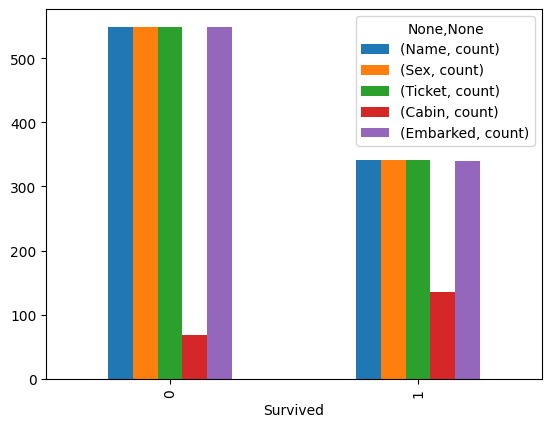

In [27]:
# Using bar plot
df.groupby("Survived")[categorical_features].agg(["count"]).plot(kind="bar")
plt.show()

In [28]:
# Ploting box plot and distribution plot for other numerical features column

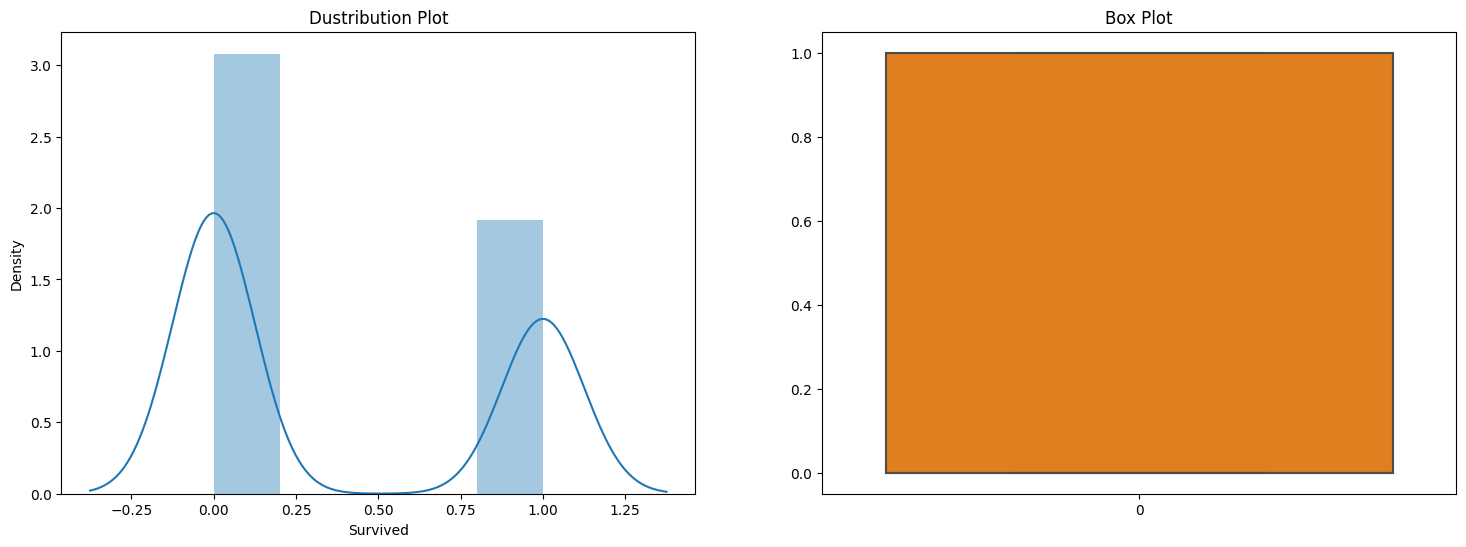

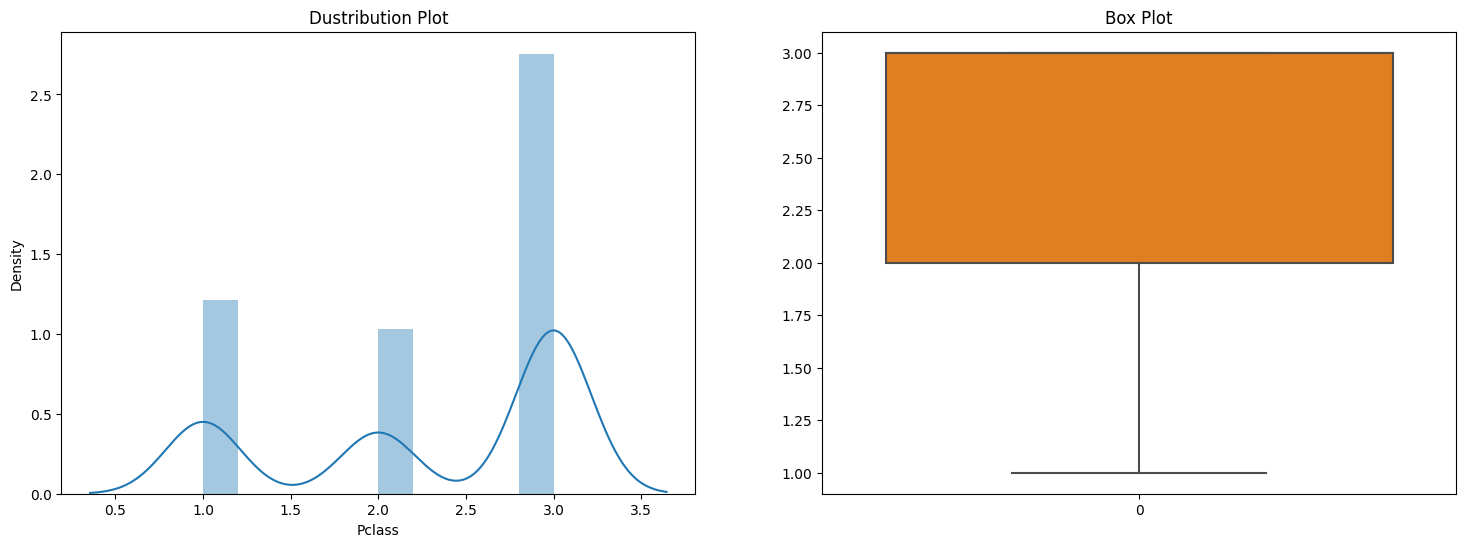

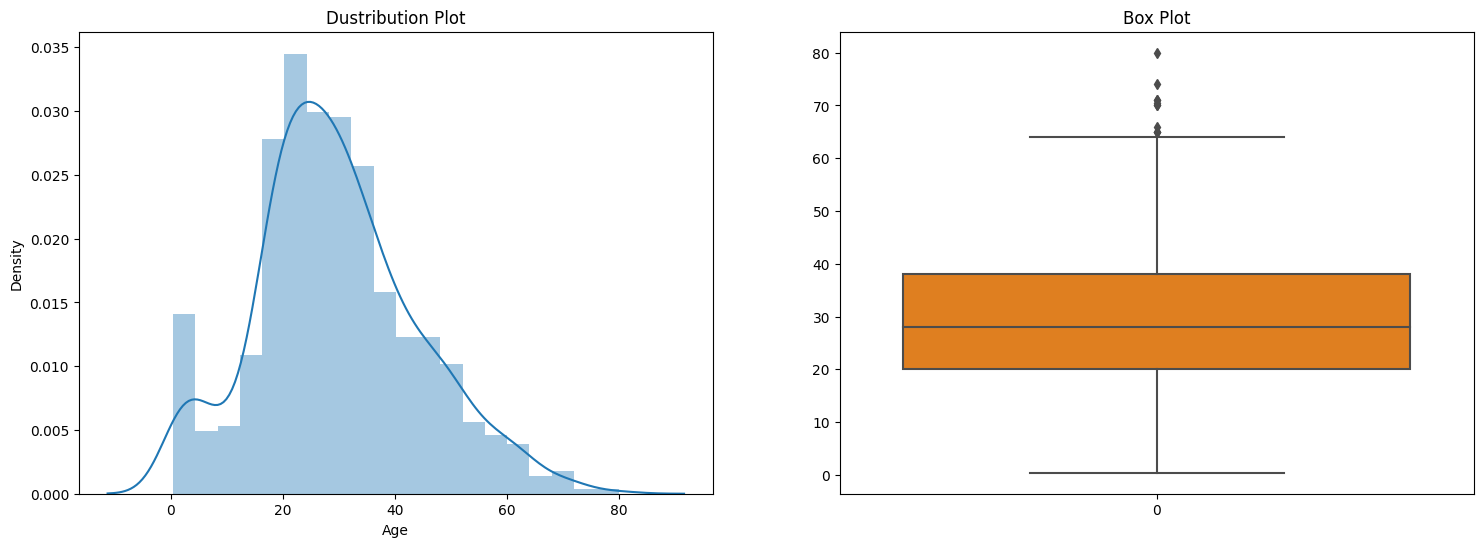

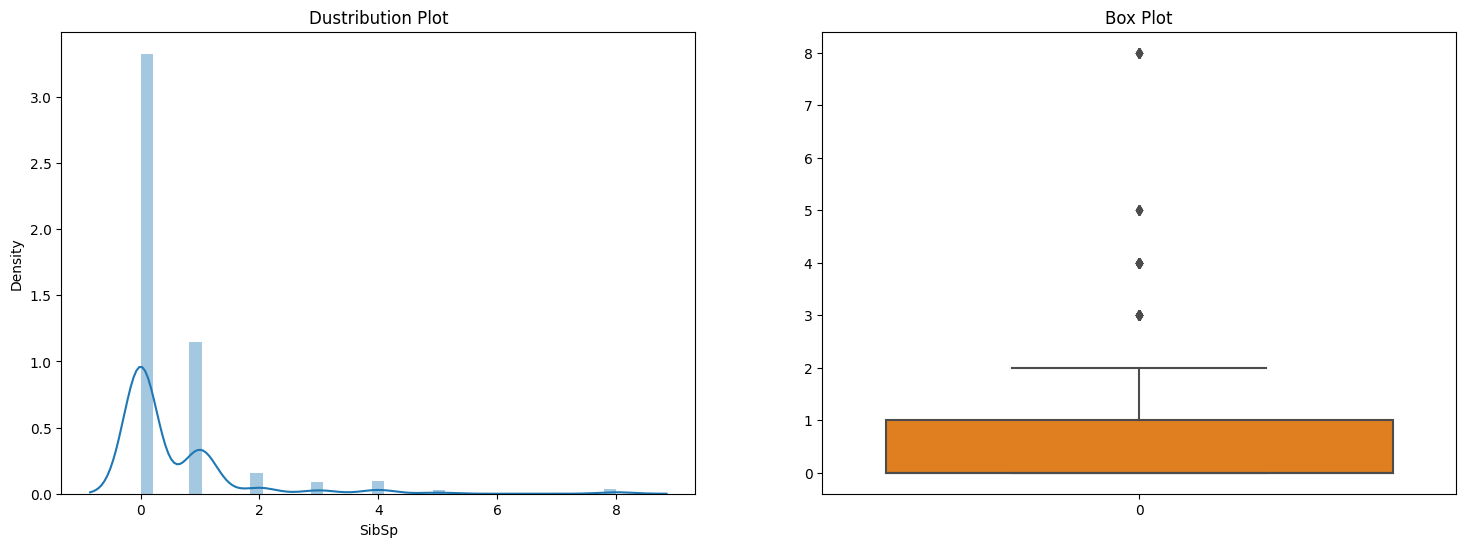

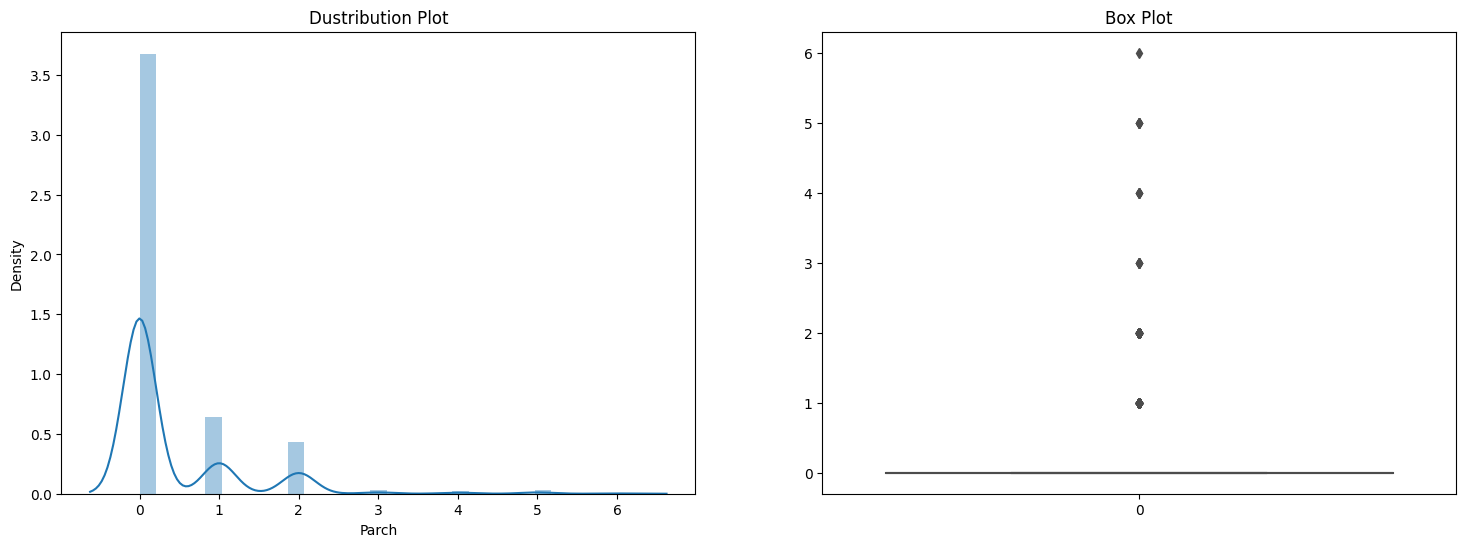

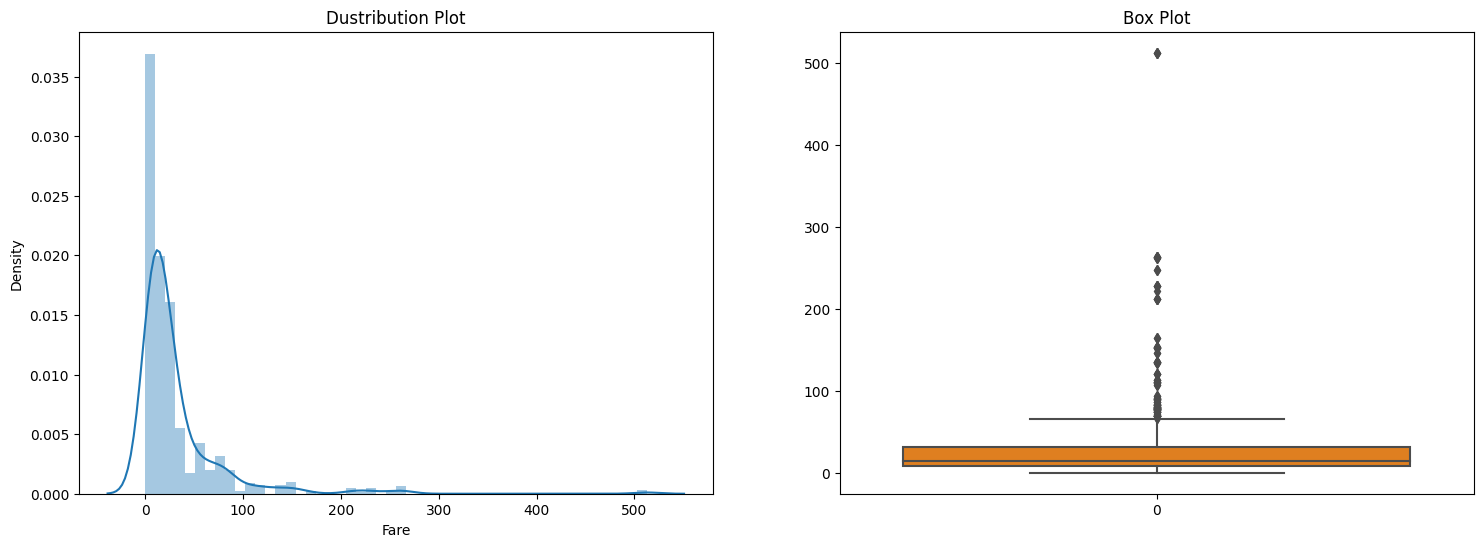

In [30]:
for feature in numerical_features:
    plt.figure(figsize=(18,6))
    
    plt.subplot(1,2,1)
    plt.title("Dustribution Plot")
    sns.distplot(df[feature])
    
    plt.subplot(1,2,2)
    plt.title("Box Plot")
    sns.boxplot(df[feature], palette="Set1_r")
    
    plt.show()
    

In [31]:
# Categorical Features


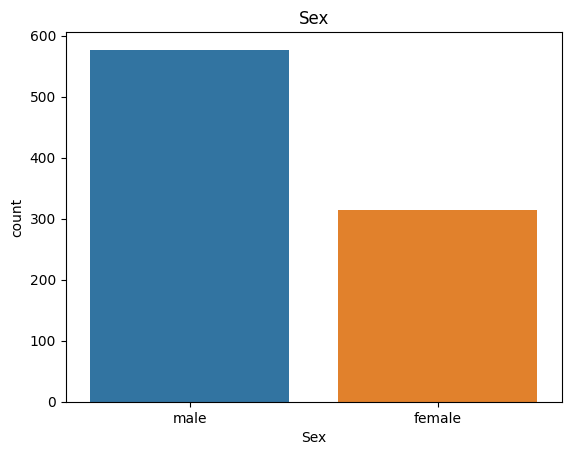

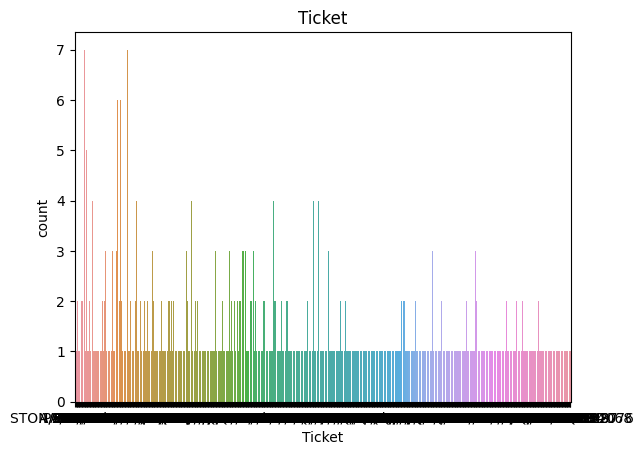

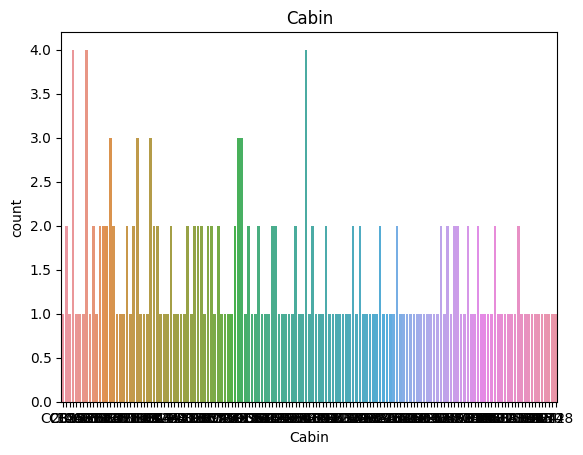

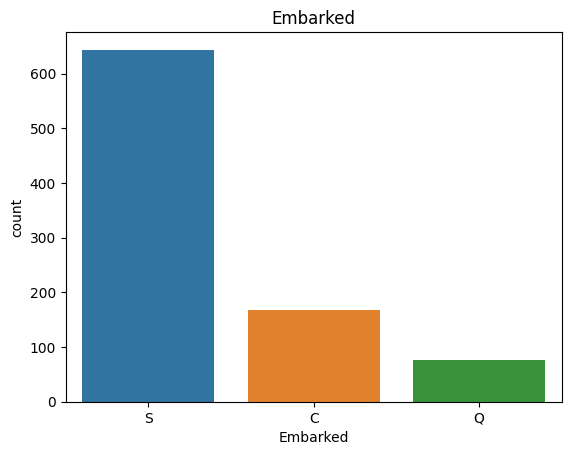

In [37]:
for feature in categorical_features:
    if feature != "Name":
        sns.countplot(data=df, x=df[feature])
        plt.title(feature)
    plt.show()

In [114]:
##Bivariant Analysis

In [65]:
df.groupby("Survived").agg(["count"])

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,count,count,count,count,count,count,count,count,count,count
Survived,,,,,,,,,,
0,549,549,549,424,549,549,549,549,68,549
1,342,342,342,290,342,342,342,342,136,340


In [66]:
df.groupby("Sex").agg(["count"])

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,count,count,count,count,count,count,count,count,count,count
Sex,,,,,,,,,,
female,314,314,314,261,314,314,314,314,97,312
male,577,577,577,453,577,577,577,577,107,577


In [67]:
df.shape

(891, 11)

In [74]:
df[(df["Survived"]==1)].count()

Survived    342
Pclass      342
Name        342
Sex         342
Age         290
SibSp       342
Parch       342
Ticket      342
Fare        342
Cabin       136
Embarked    340
dtype: int64

In [107]:
# aggregate the data based on the index and values
agg_df = df.groupby(['Survived', "Sex"]).agg("count").reset_index()

# pivot the aggregated DataFrame
agg_df.pivot(index='Survived', columns='Sex')

Pclass        Name         Age       SibSp       Parch      Ticket  \
Sex      female male female male female male female male female male female   
Survived                                                                      
0            81  468     81  468     64  360     81  468     81  468     81   
1           233  109    233  109    197   93    233  109    233  109    233   

                Fare       Cabin      Embarked       
Sex      male female male female male   female male  
Survived                                             
0         468     81  468      6   62       81  468  
1         109    233  109     91   45      231  109

In [110]:
# aggregate the data based on the index and values
agg_df = df.groupby(['Survived', "Embarked"]).agg("count").reset_index()

# pivot the aggregated DataFrame
agg_df.pivot(index='Survived', columns='Embarked').T

Survived           0    1
       Embarked          
Pclass C          75   93
       Q          47   30
       S         427  217
Name   C          75   93
       Q          47   30
       S         427  217
Sex    C          75   93
       Q          47   30
       S         427  217
Age    C          51   79
       Q          20    8
       S         353  201
SibSp  C          75   93
       Q          47   30
       S         427  217
Parch  C          75   93
       Q          47   30
       S         427  217
Ticket C          75   93
       Q          47   30
       S         427  217
Fare   C          75   93
       Q          47   30
       S         427  217
Cabin  C          17   52
       Q           2    2
       S          49   80

In [113]:
# aggregate the data based on the index and values
agg_df = df.groupby(['Survived', "Pclass"]).agg("count").reset_index()

# pivot the aggregated DataFrame
agg_df.pivot(index='Survived', columns='Pclass').T

Survived           0    1
         Pclass          
Name     1        80  136
         2        97   87
         3       372  119
Sex      1        80  136
         2        97   87
         3       372  119
Age      1        64  122
         2        90   83
         3       270   85
SibSp    1        80  136
         2        97   87
         3       372  119
Parch    1        80  136
         2        97   87
         3       372  119
Ticket   1        80  136
         2        97   87
         3       372  119
Fare     1        80  136
         2        97   87
         3       372  119
Cabin    1        59  117
         2         3   13
         3         6    6
Embarked 1        80  134
         2        97   87
         3       372  119

In [117]:
# aggregate the data based on the index and values
agg_df = df.groupby(['Survived', "SibSp"]).agg("count").reset_index()

# pivot the aggregated DataFrame
print(agg_df.pivot(index='Survived', columns='SibSp'))

Pclass                                      Name               ...  \
SibSp         0      1     2     3     4    5    8      0      1     2  ...   
Survived                                                                ...   
0         398.0   97.0  15.0  12.0  15.0  5.0  7.0  398.0   97.0  15.0  ...   
1         210.0  112.0  13.0   4.0   3.0  NaN  NaN  210.0  112.0  13.0  ...   

         Cabin           Embarked                                     
SibSp        4    5    8        0      1     2     3     4    5    8  
Survived                                                              
0          0.0  0.0  0.0    398.0   97.0  15.0  12.0  15.0  5.0  7.0  
1          0.0  NaN  NaN    208.0  112.0  13.0   4.0   3.0  NaN  NaN  

[2 rows x 63 columns]